### IMPORTS

In [460]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler


In [461]:
df = pd.read_csv('../data/gsom_sample_csv.csv')  

### Format display

In [462]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 
print(df.head().to_string())

       STATION     DATE  LATITUDE  LONGITUDE  ELEVATION                                         NAME  ADPT ADPT_ATTRIBUTES  ASLP ASLP_ATTRIBUTES  ASTP ASTP_ATTRIBUTES  AWBT AWBT_ATTRIBUTES  AWND AWND_ATTRIBUTES  CDSD CDSD_ATTRIBUTES   CLDD CLDD_ATTRIBUTES  DP01 DP01_ATTRIBUTES  DP10 DP10_ATTRIBUTES  DP1X DP1X_ATTRIBUTES  DSND DSND_ATTRIBUTES  DSNW DSNW_ATTRIBUTES  DT00 DT00_ATTRIBUTES  DT32 DT32_ATTRIBUTES  DX32 DX32_ATTRIBUTES  DX70 DX70_ATTRIBUTES  DX90 DX90_ATTRIBUTES  DYFG  DYFG_ATTRIBUTES  DYHF  DYHF_ATTRIBUTES        DYNT DYNT_ATTRIBUTES        DYSD DYSD_ATTRIBUTES        DYSN DYSN_ATTRIBUTES  DYTS  DYTS_ATTRIBUTES        DYXP DYXP_ATTRIBUTES        DYXT DYXT_ATTRIBUTES  EMNT EMNT_ATTRIBUTES  EMSD EMSD_ATTRIBUTES  EMSN EMSN_ATTRIBUTES  EMXP EMXP_ATTRIBUTES  EMXT EMXT_ATTRIBUTES   HDSD HDSD_ATTRIBUTES  HN01 HN01_ATTRIBUTES  HN02 HN02_ATTRIBUTES  HN03 HN03_ATTRIBUTES  HN04 HN04_ATTRIBUTES   HTDD HTDD_ATTRIBUTES  HX01 HX01_ATTRIBUTES  HX02 HX02_ATTRIBUTES  HX03 HX03_ATTRIBUTES  HX04

In [463]:

# Convert everything to string
df_str = df.head().astype(str)

# Set desired width for each column (optional tweak per your data)
col_width = 20  # or tweak per column if needed

# Center each column's contents
df_centered = df_str.applymap(lambda x: x.center(col_width))

# Center the column headers too
df_centered.columns = [col.center(col_width) for col in df_centered.columns]

# Print the nicely formatted table
print(df_centered.to_string(index=False))


      STATION                DATE               LATITUDE            LONGITUDE            ELEVATION                                      NAME                 ADPT           ADPT_ATTRIBUTES            ASLP           ASLP_ATTRIBUTES            ASTP           ASTP_ATTRIBUTES            AWBT           AWBT_ATTRIBUTES            AWND           AWND_ATTRIBUTES            CDSD           CDSD_ATTRIBUTES            CLDD           CLDD_ATTRIBUTES            DP01           DP01_ATTRIBUTES            DP10           DP10_ATTRIBUTES            DP1X           DP1X_ATTRIBUTES            DSND           DSND_ATTRIBUTES            DSNW           DSNW_ATTRIBUTES            DT00           DT00_ATTRIBUTES            DT32           DT32_ATTRIBUTES            DX32           DX32_ATTRIBUTES            DX70           DX70_ATTRIBUTES            DX90           DX90_ATTRIBUTES            DYFG           DYFG_ATTRIBUTES            DYHF           DYHF_ATTRIBUTES            DYNT           DYNT_ATTRIBUTES            DYS

C:\Users\Paul-Dieter\AppData\Local\Temp\ipykernel_20164\753125296.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_centered = df_str.applymap(lambda x: x.center(col_width))


### Select Important features from data set and rename them according to the documentation

In [464]:
# Select the features
features = ['DATE', 'STATION', 'TMAX', 'TMIN', 'TAVG', 'AWND', 'PRCP', 'ADPT', 'RHAV', 'ASLP']
df_selected = df[features]

# Rename columns to more readable names
df_selected = df_selected.rename(columns={
    'DATE': 'date',
    'STATION': 'station_id',
    'TMAX': 'max_temperature',
    'TMIN': 'min_temperature',
    'TAVG': 'avg_temperature',
    'AWND': 'avg_wind_speed',
    'PRCP': 'total_precipitation',
    'ADPT': 'avg_dew_point',
    'RHAV': 'avg_relative_humidity',
    'ASLP': 'avg_sea_level_pressure'
})


### K-Nearest Neighbors (KNN) to predict missing values.

In [465]:
# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Remove 'date' and 'station_id' for imputation
df_selected_numeric = df_selected.drop(columns=['date', 'station_id'])

# Perform imputation
df_selected_imputed = imputer.fit_transform(df_selected_numeric)

# Convert the imputed data back into a DataFrame
df_imputed = pd.DataFrame(df_selected_imputed, columns=df_selected_numeric.columns)

# Add the 'date' column back to the DataFrame
df_imputed['date'] = df_selected['date'].reset_index(drop=True)

### Graph all columns to help understand data and look for patterns

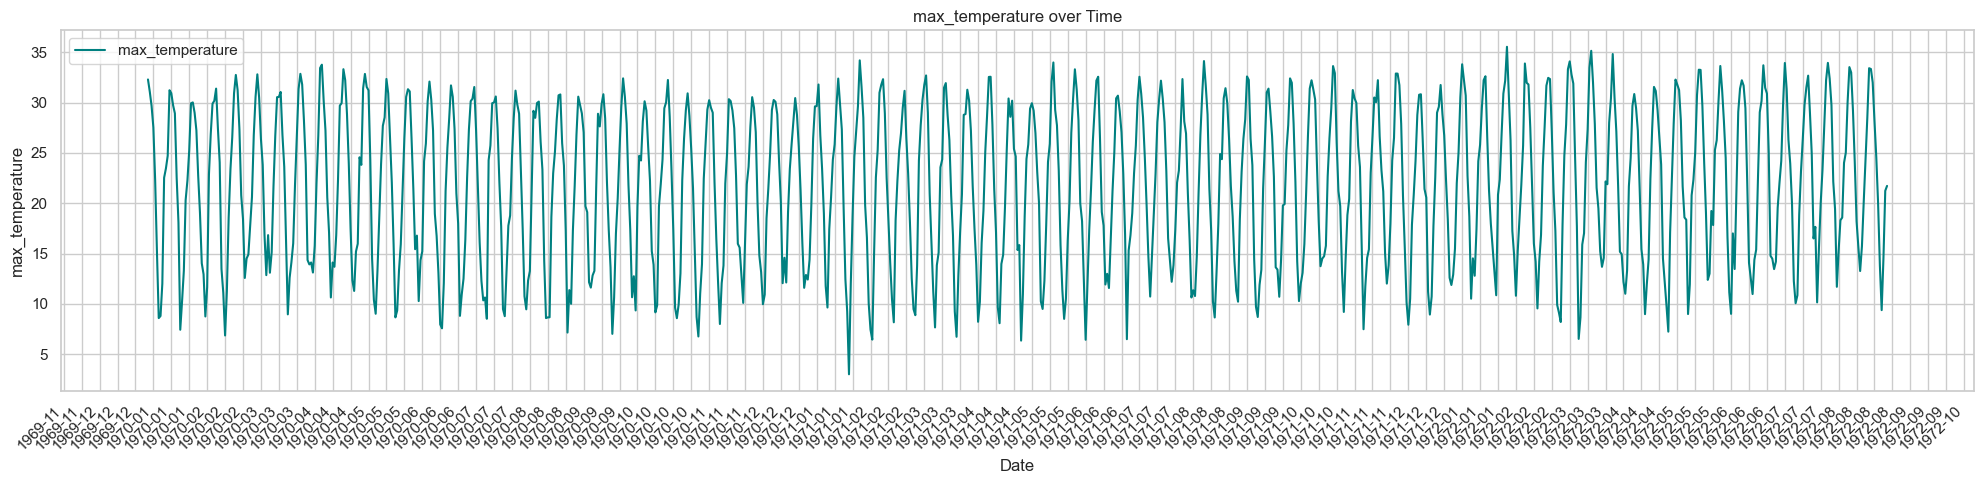

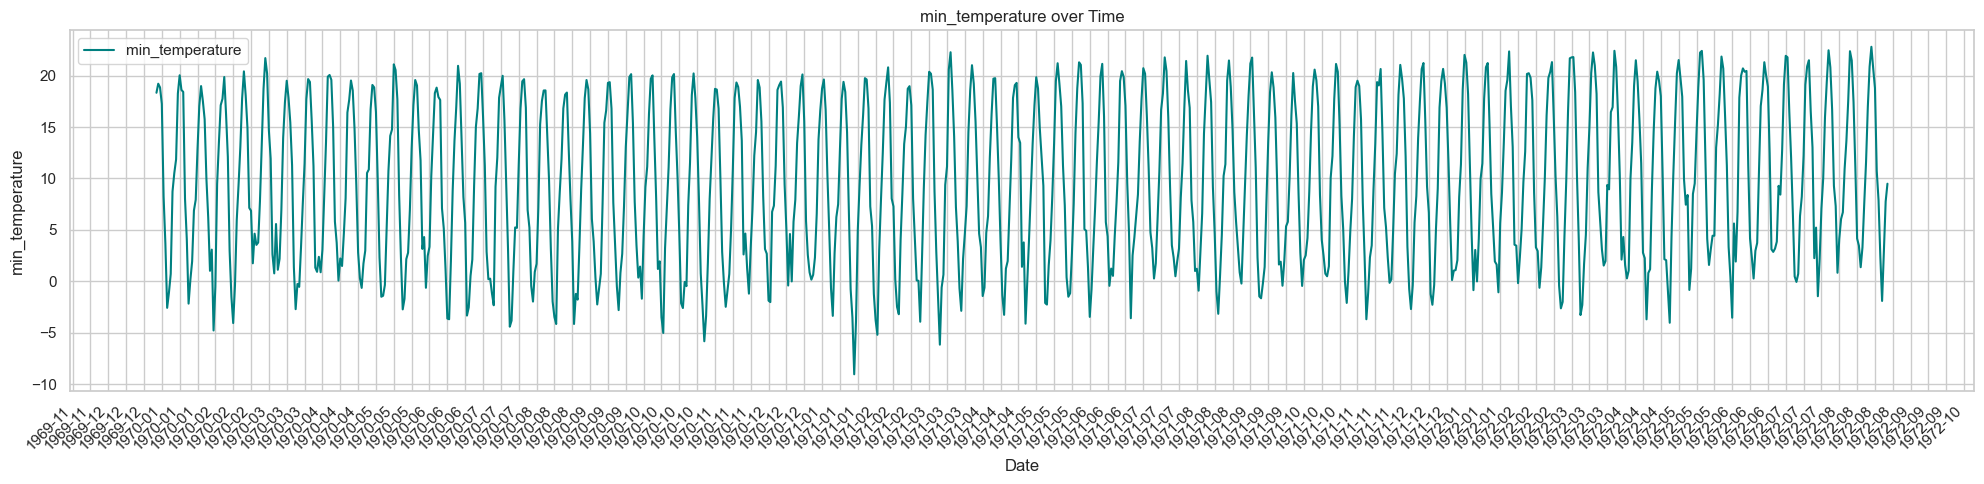

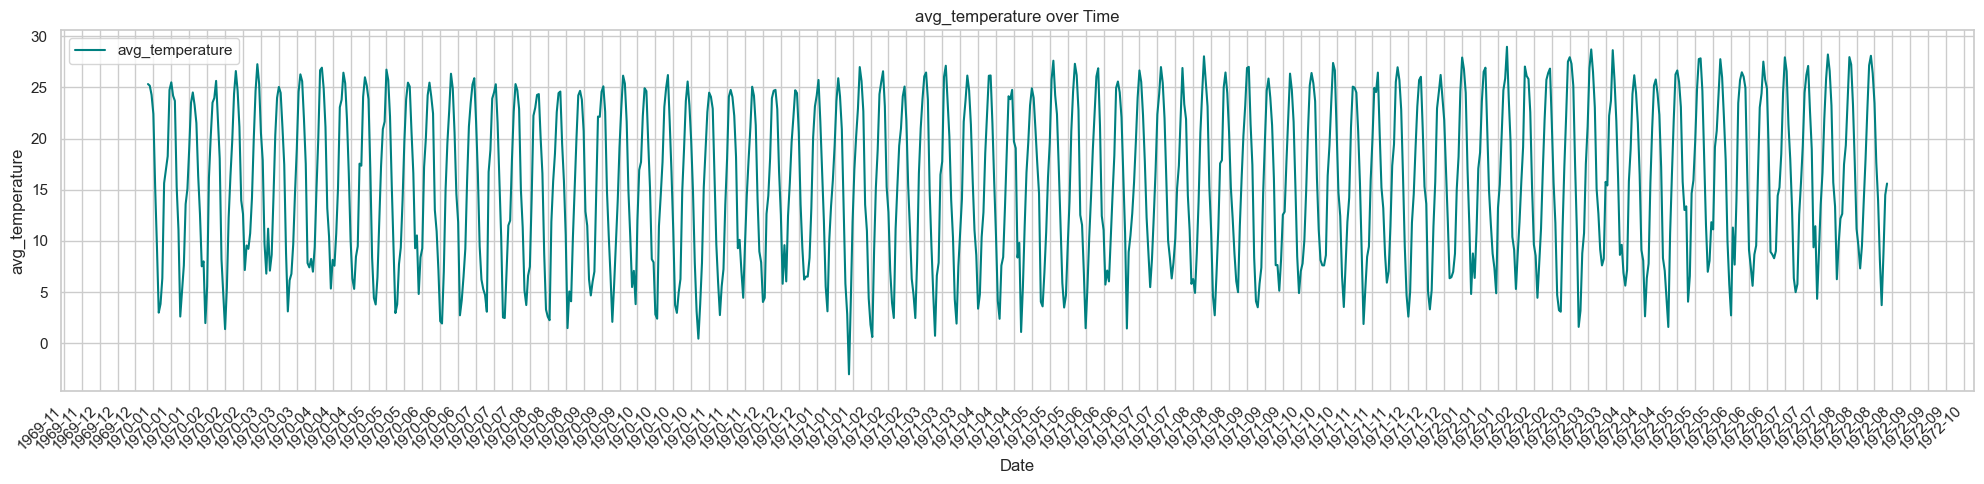

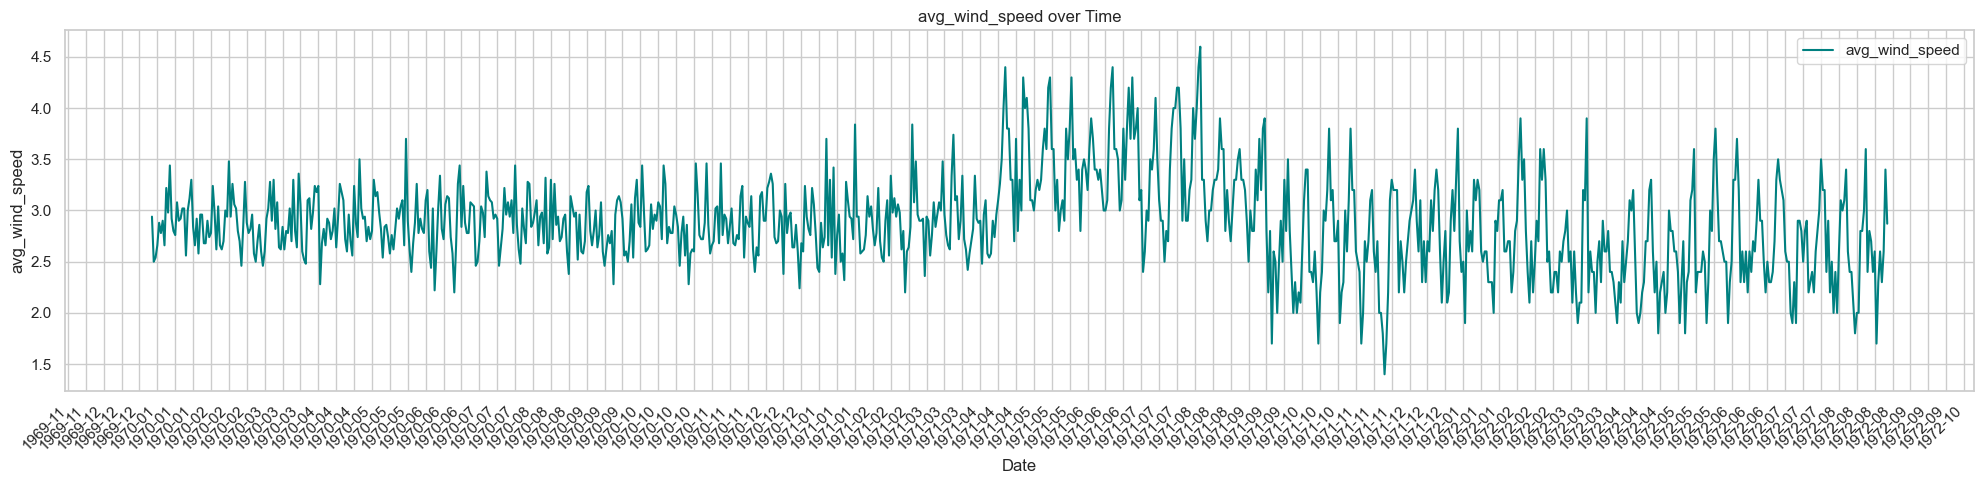

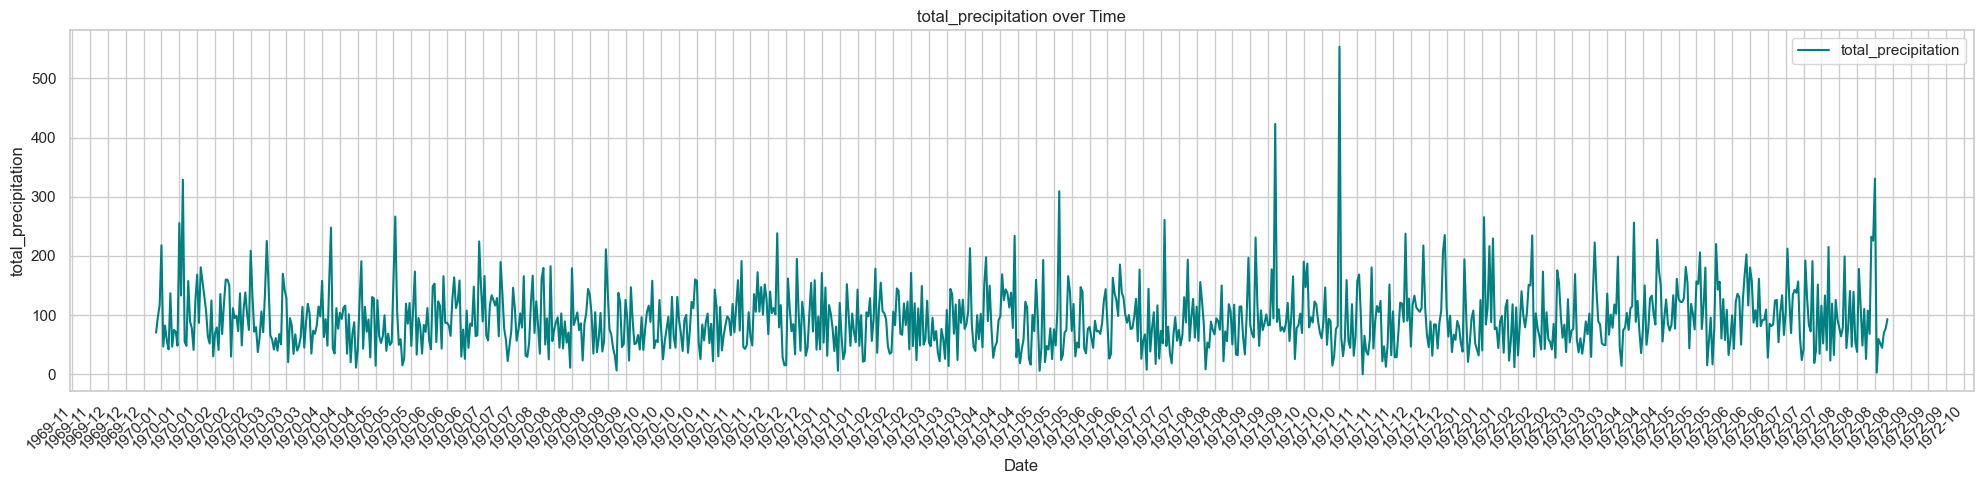

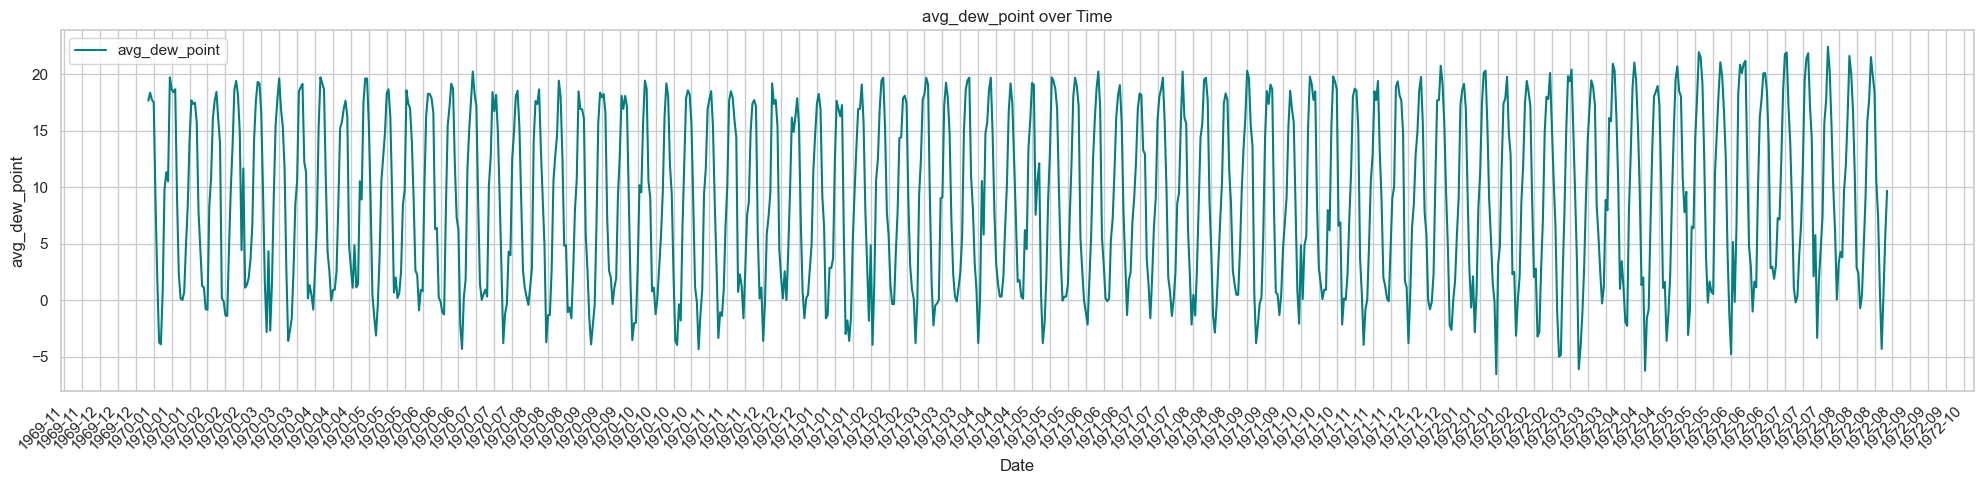

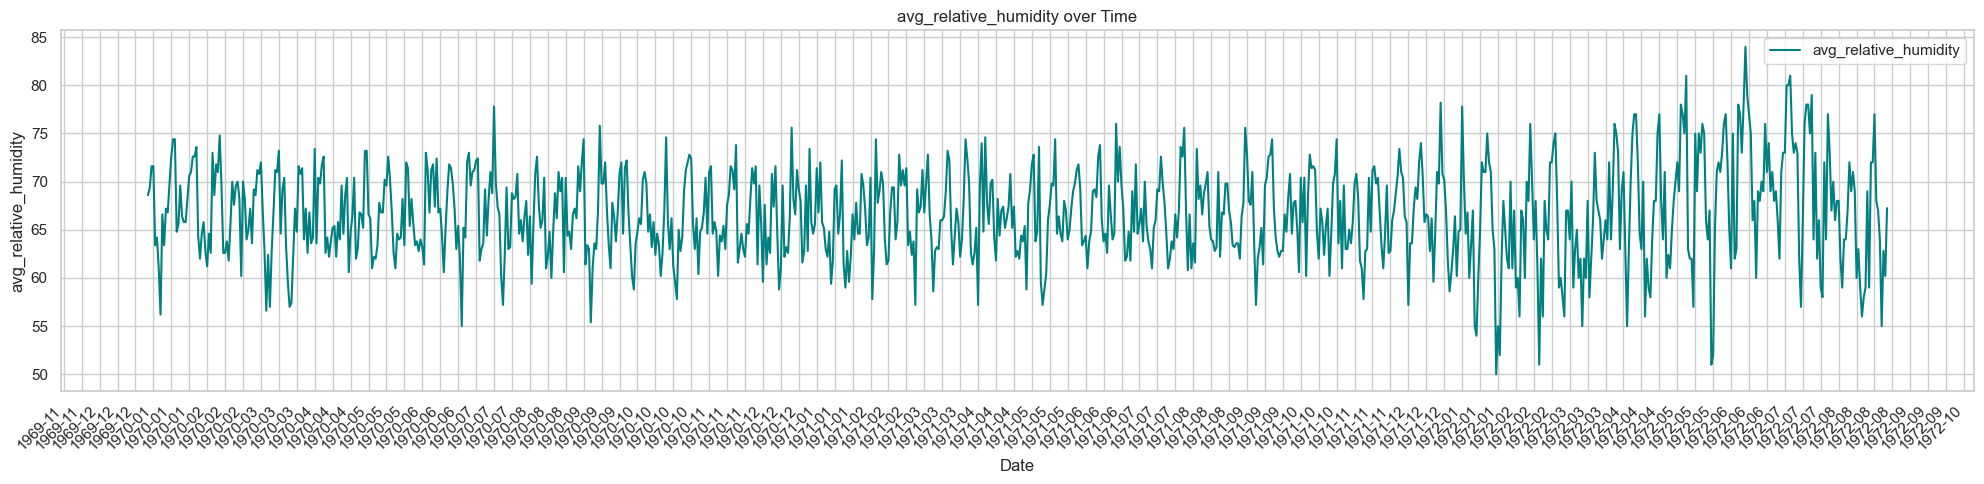

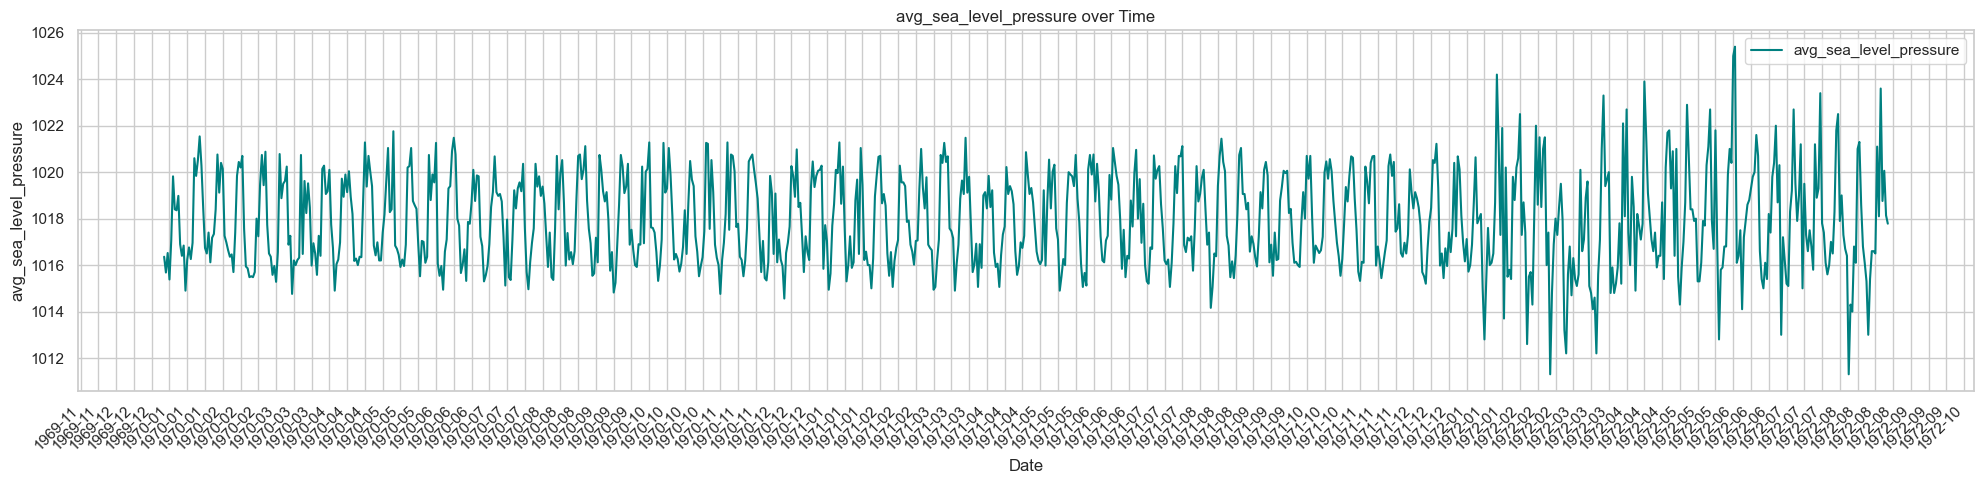

In [466]:
#loop through the features and plot
for feature in df_imputed.columns:
    if feature != 'date':  # Skip 'date' as we are plotting other features
        plt.figure(figsize=(20, 5))  
        plt.plot(df_imputed['date'], df_imputed[feature], label=feature, color='teal')
        plt.xlabel('Date')
        plt.ylabel(feature)
        plt.title(f'{feature} over Time')

        # Format date labels to show only year and month
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

        # Set the frequency of date labels to show only every 10th date
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

        plt.xticks(rotation=45, ha='right') 
        plt.tight_layout()  
        plt.grid(True)
        plt.legend()
        plt.show()

In [467]:
#Double check for missing values in imputed data
df_imputed.isna().any(axis=1).sum()

0

### No empty or NAN Values are present, time to remove outliers.

In [468]:
df_imputed.head()

,max_temperature,min_temperature,avg_temperature,avg_wind_speed,total_precipitation,avg_dew_point,avg_relative_humidity,avg_sea_level_pressure,date
0,32.31,18.33,25.32,2.94,70.4,17.682,68.6,1016.36,1944-06
1,31.10,19.21,25.16,2.50,97.0,18.384,69.4,1015.68,1944-07
2,29.68,18.85,24.26,2.54,117.0,17.752,71.6,1016.52,1944-08
3,27.54,17.25,22.40,2.66,218.0,17.532,71.6,1015.38,1944-09
4,22.29,8.25,15.27,2.88,46.9,8.866,63.4,1017.06,1944-10


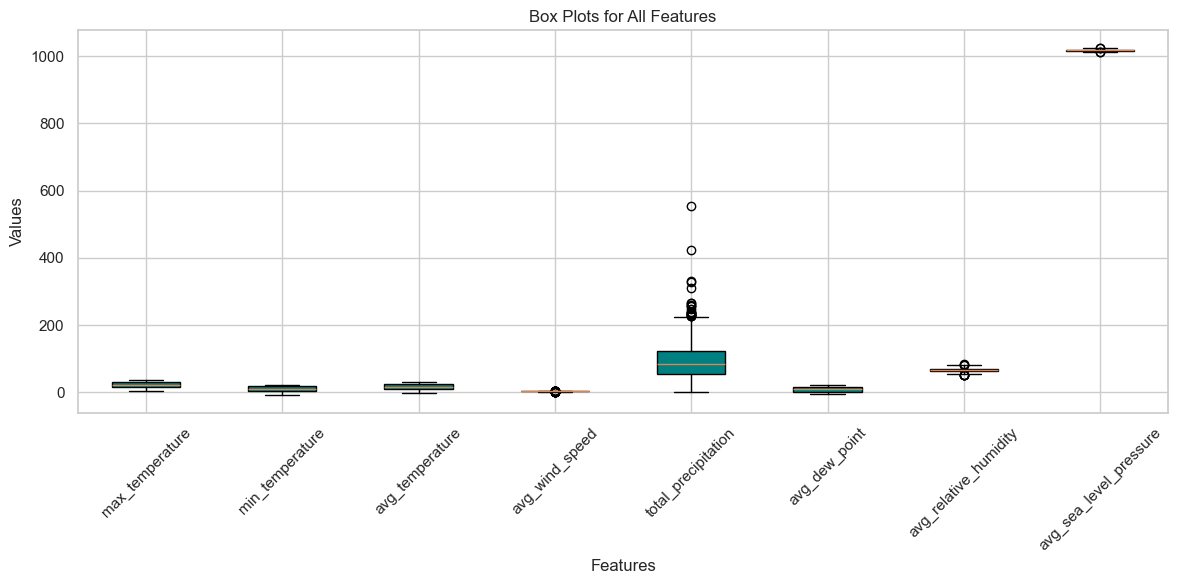

In [469]:
plt.figure(figsize=(12, 6))

# Create a box plot for each feature (excluding 'date' and 'station_id')
plt.boxplot([df_imputed[feature] for feature in df_imputed.columns if feature != 'date'], 
            patch_artist=True, 
            boxprops=dict(facecolor='teal', color='black'))

plt.xticks(range(1, len(df_imputed.columns)), [feature for feature in df_imputed.columns if feature != 'date'], rotation=45)


plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box Plots for All Features')


plt.tight_layout()
plt.show()


### Remove outliers

In [473]:
df_imputed = df_imputed[
    (df_imputed['total_precipitation'] <= 200) &
    (df_imputed['avg_relative_humidity'] <= 80) & (df_imputed['avg_relative_humidity'] >= 55) &
    (df_imputed['avg_wind_speed'] <= 4.25) & (df_imputed['avg_wind_speed'] >= 2.0) &
    (df_imputed['avg_sea_level_pressure'] <= 1024) & (df_imputed['avg_sea_level_pressure'] >= 1013)
]

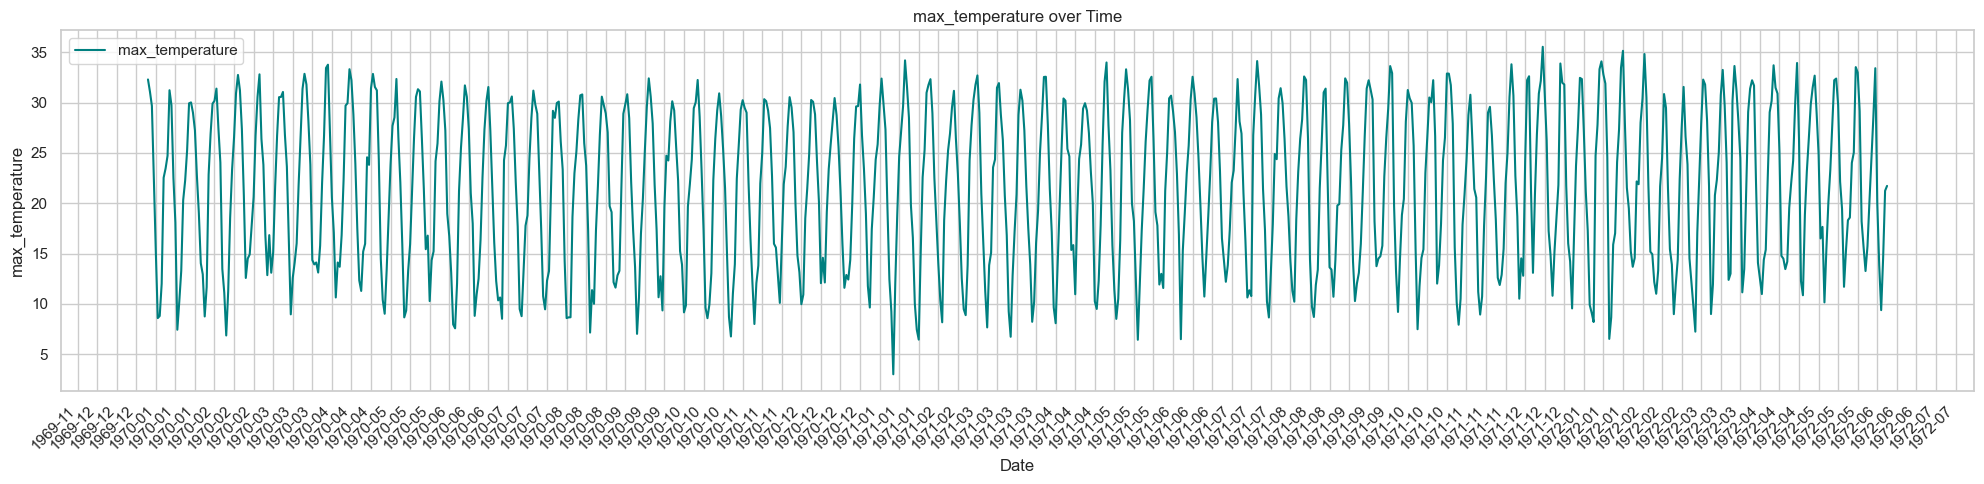

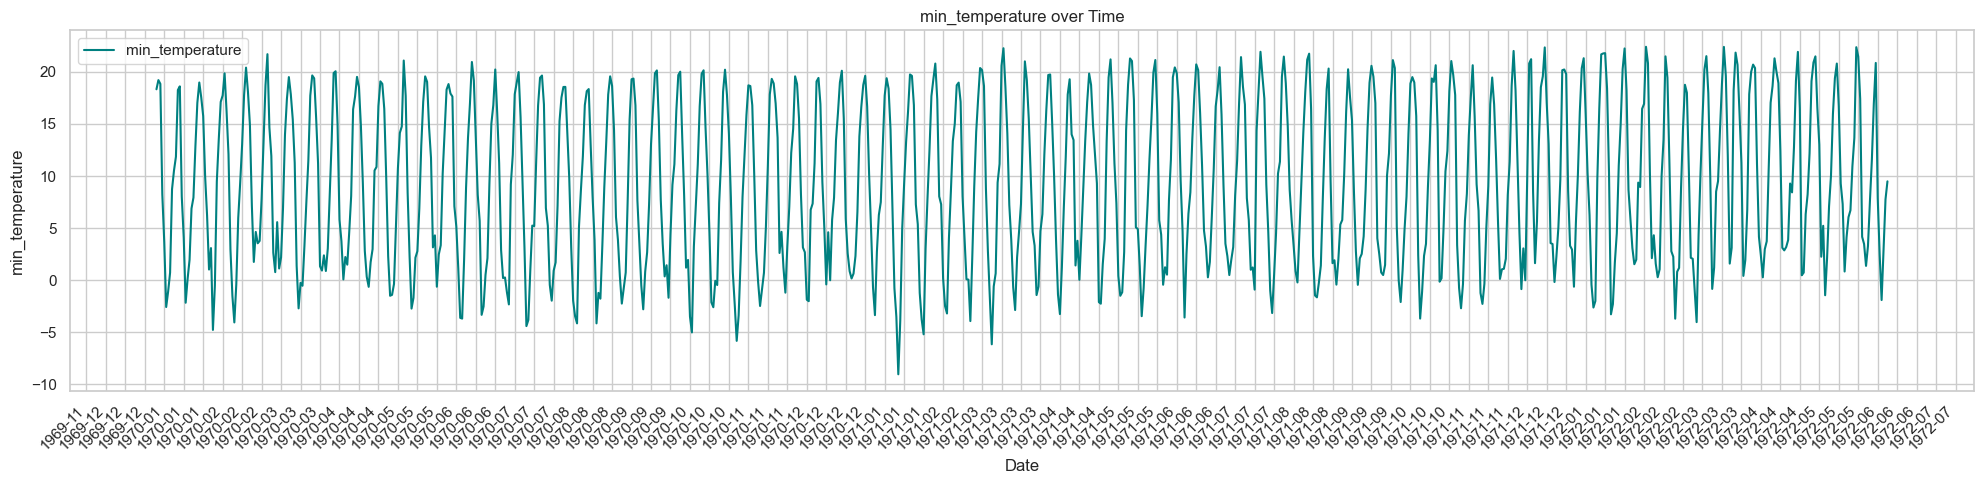

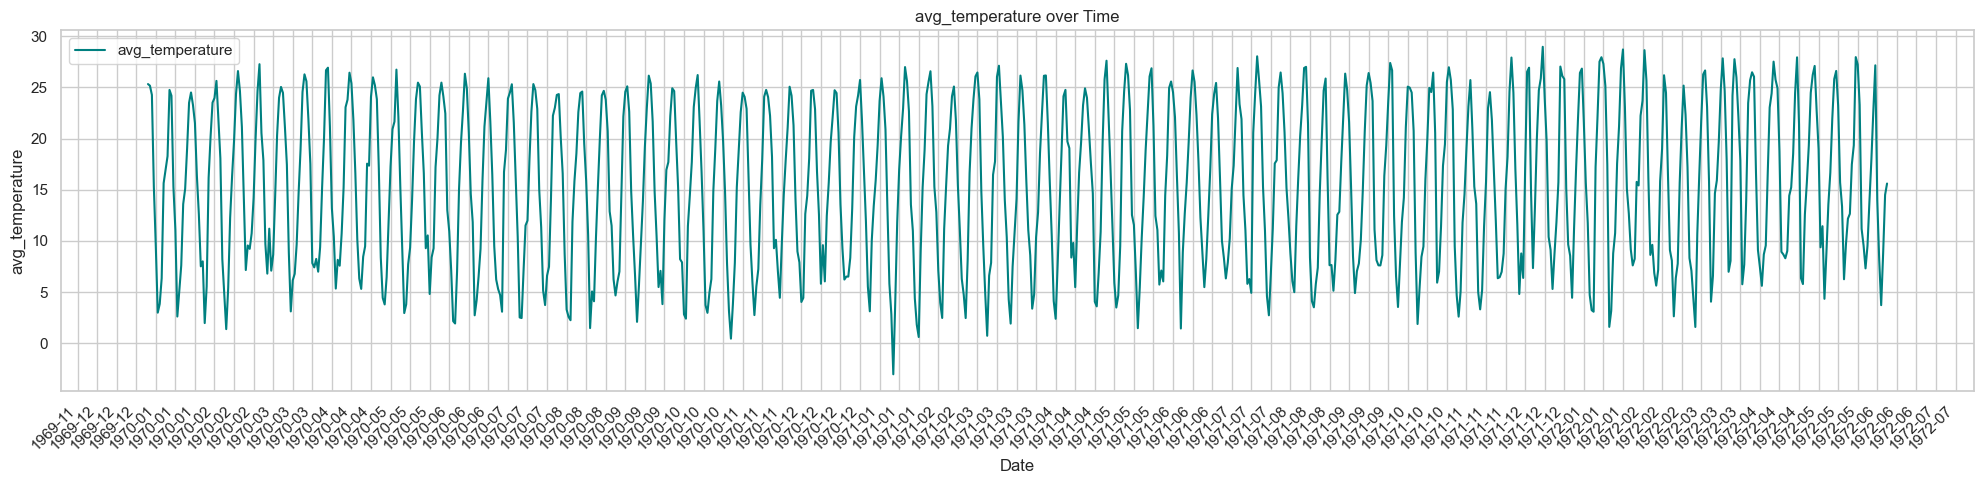

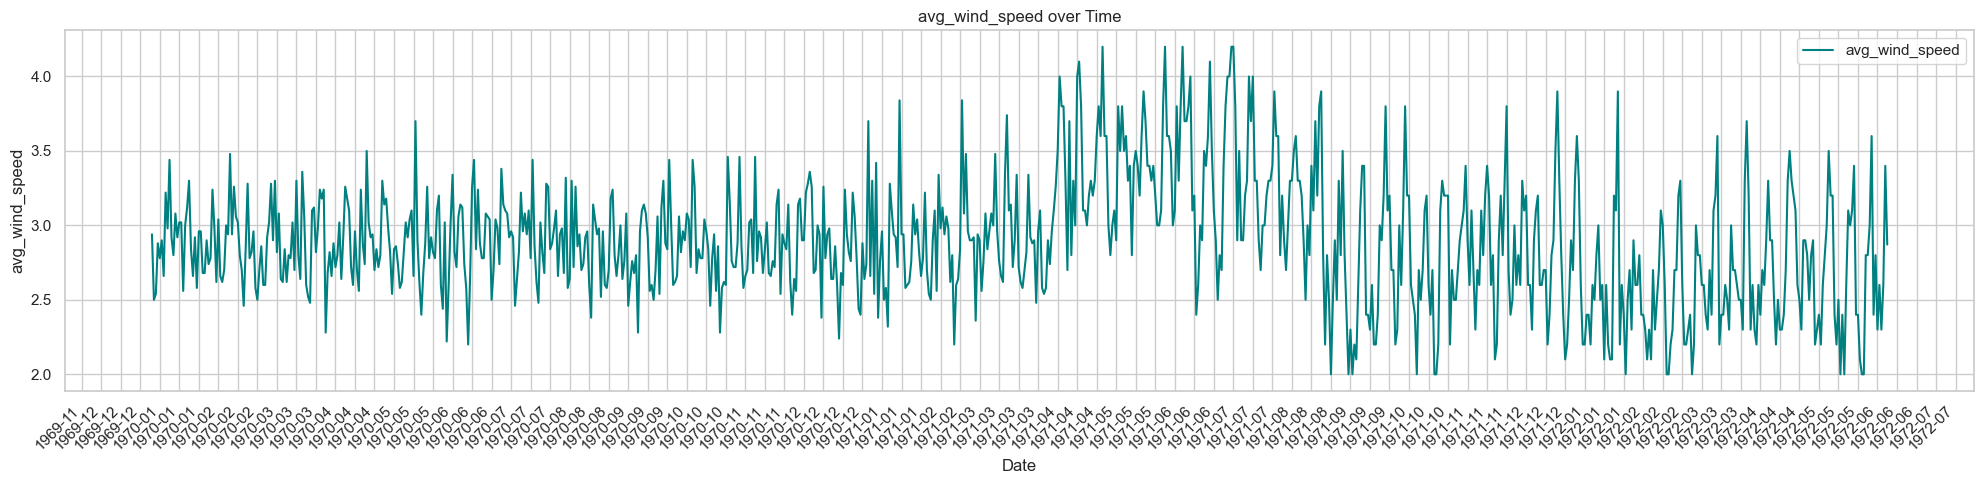

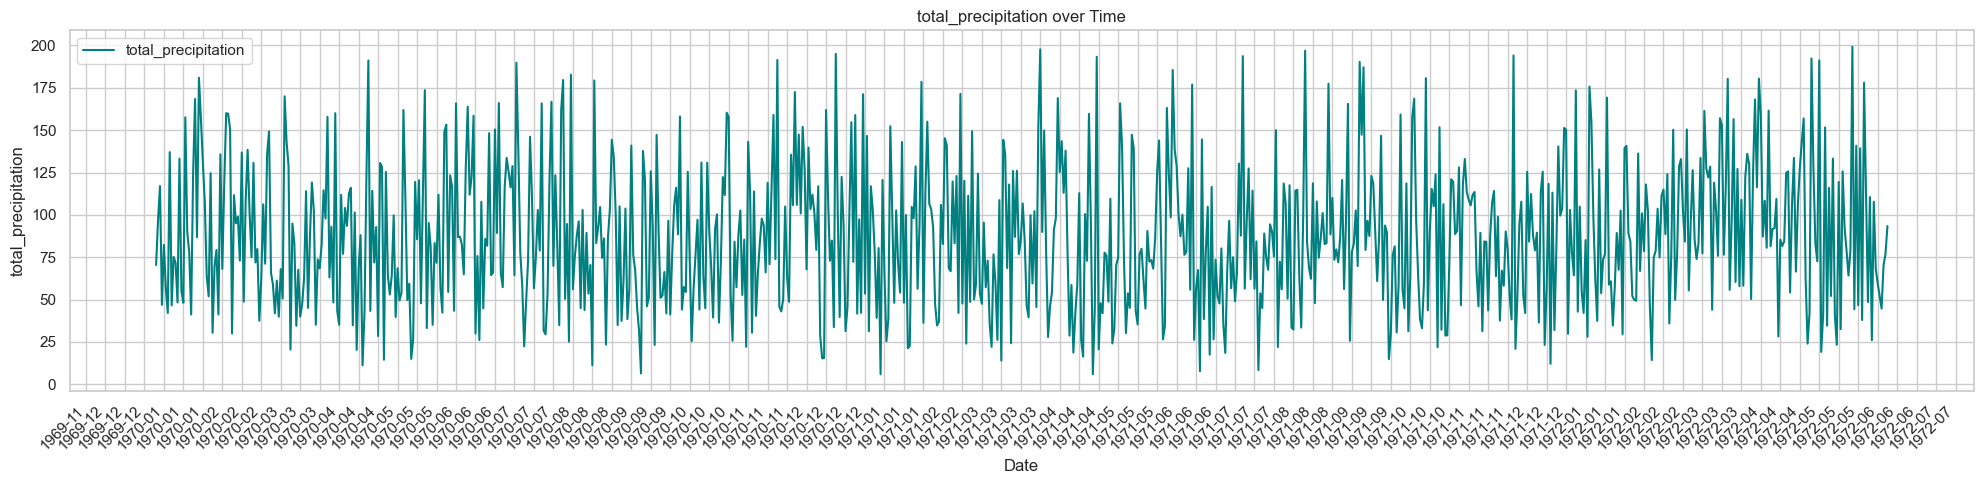

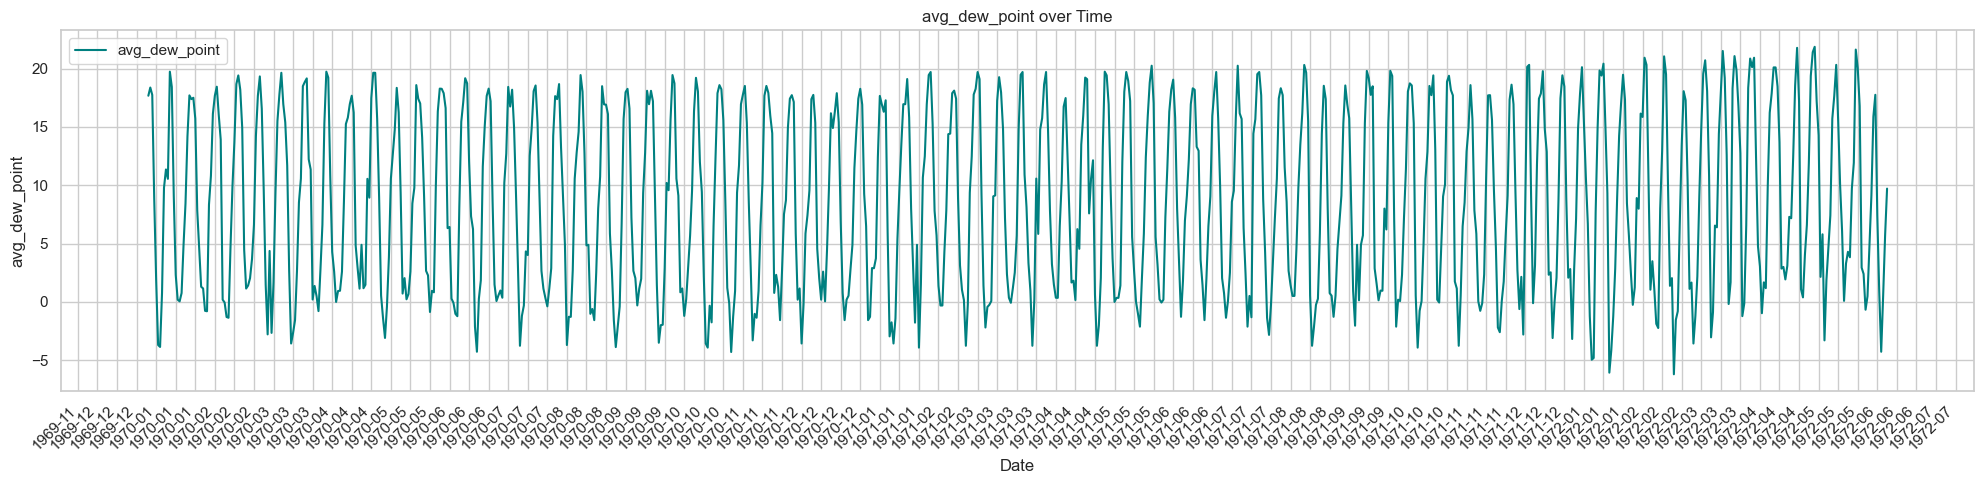

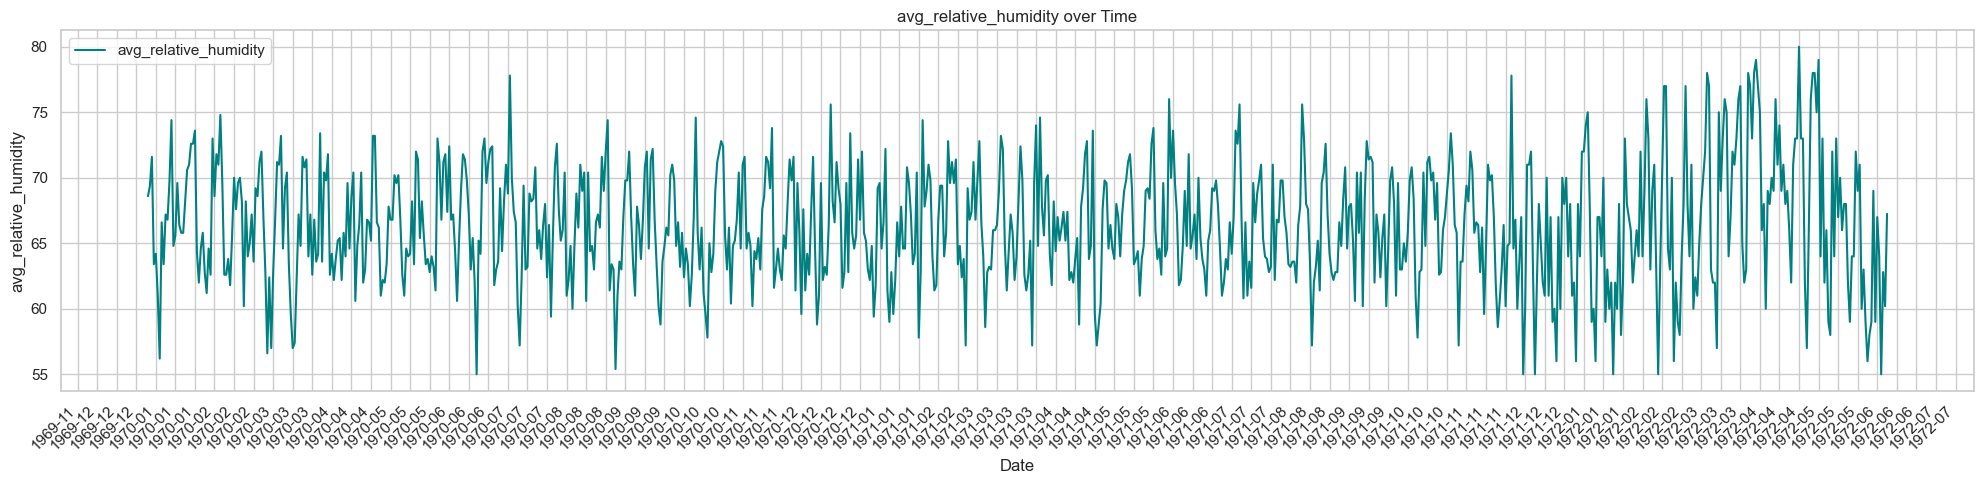

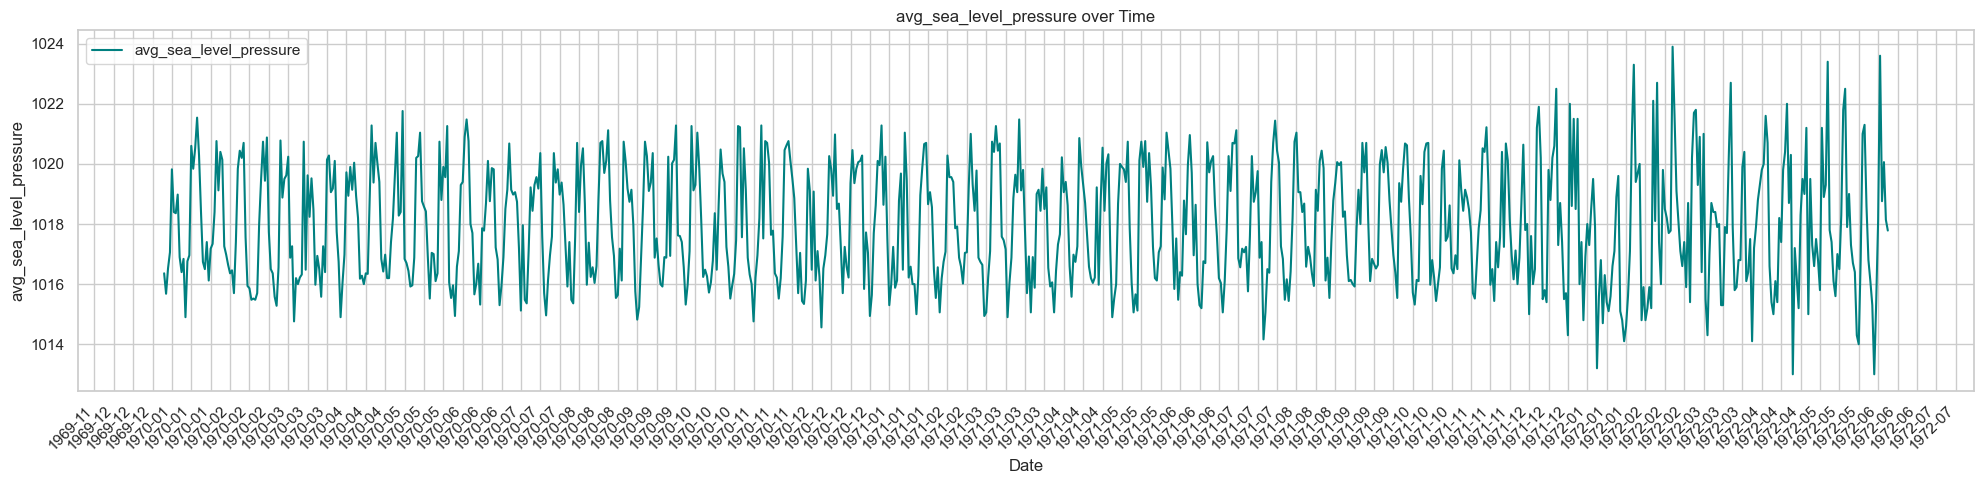

In [474]:
#loop through the features and plot
for feature in df_imputed.columns:
    if feature != 'date':  # Skip 'date' as we are plotting other features
        plt.figure(figsize=(20, 5))  
        plt.plot(df_imputed['date'], df_imputed[feature], label=feature, color='teal')
        plt.xlabel('Date')
        plt.ylabel(feature)
        plt.title(f'{feature} over Time')

        # Format date labels to show only year and month
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

        # Set the frequency of date labels to show only every 10th date
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

        plt.xticks(rotation=45, ha='right') 
        plt.tight_layout()  
        plt.grid(True)
        plt.legend()
        plt.show()

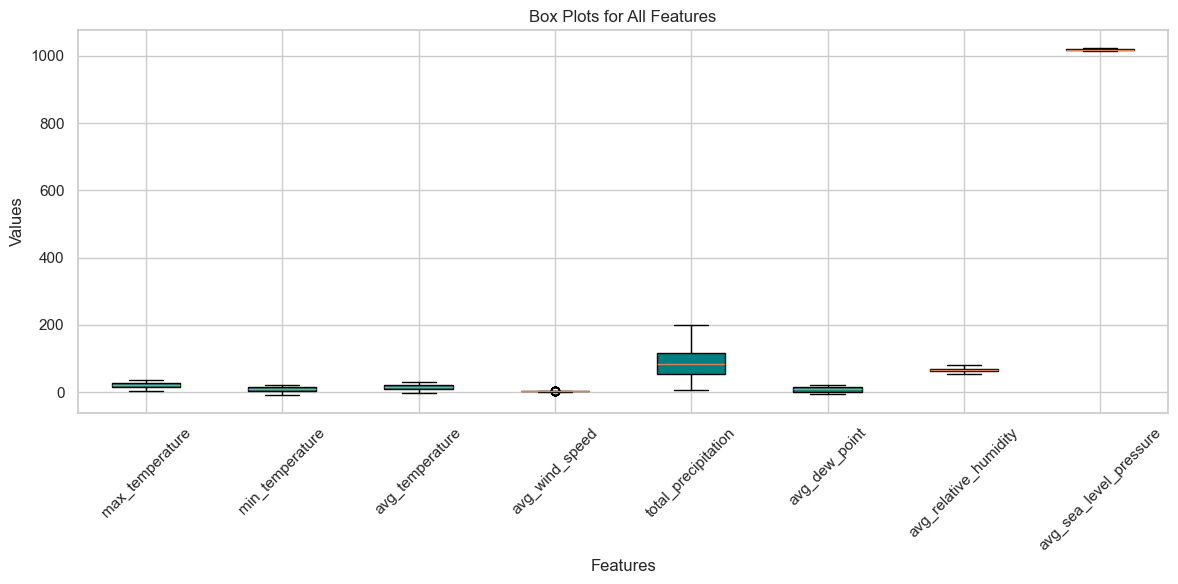

In [476]:
plt.figure(figsize=(12, 6))

# Create a box plot for each feature (excluding 'date' and 'station_id')
plt.boxplot([df_imputed[feature] for feature in df_imputed.columns if feature != 'date'], 
            patch_artist=True, 
            boxprops=dict(facecolor='teal', color='black'))

plt.xticks(range(1, len(df_imputed.columns)), [feature for feature in df_imputed.columns if feature != 'date'], rotation=45)


plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box Plots for All Features')


plt.tight_layout()
plt.show()

### Scale Data

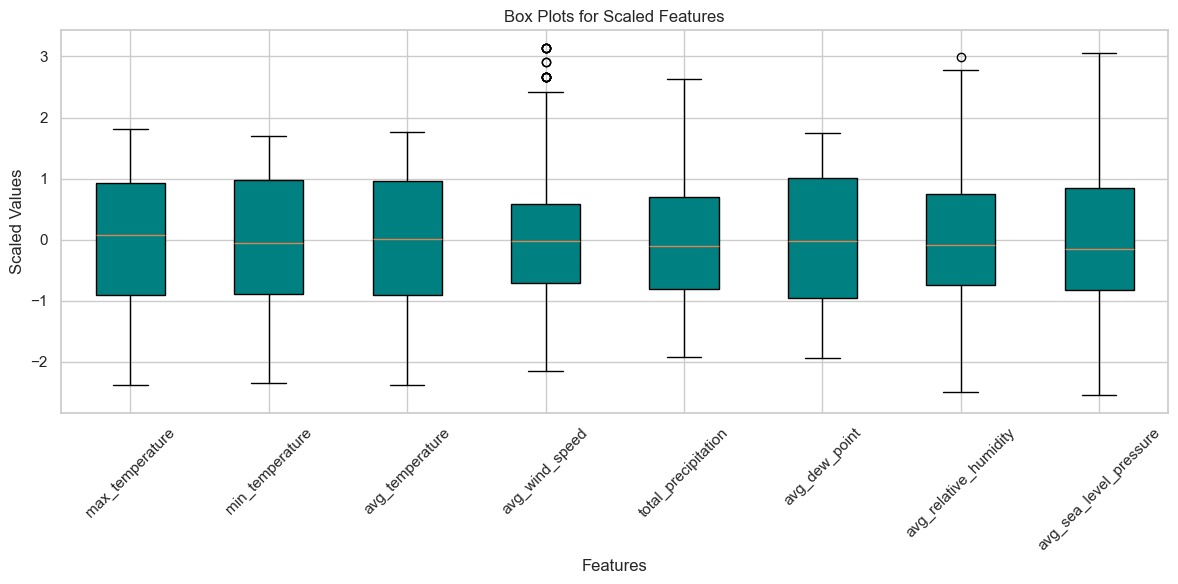

In [ ]:
# Scale the imputed data (excluding the 'date' column)
df_imputed_numeric = df_imputed.drop(columns=['date'])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed_numeric)

# Convert scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_imputed_numeric.columns)

plt.figure(figsize=(12, 6))


data_for_boxplots = [df_scaled[feature] for feature in df_scaled.columns]

# Create the box plots
plt.boxplot(data_for_boxplots, patch_artist=True, boxprops=dict(facecolor='teal', color='black'))


plt.xticks(range(1, len(df_scaled.columns) + 1), df_scaled.columns, rotation=45)


plt.xlabel('Features')
plt.ylabel('Scaled Values')
plt.title('Box Plots for Scaled Features')


plt.tight_layout()
plt.show()